# A Primer in Econometric Theory

* [John Stachurski](http://johnstachurski.net/index.html)

## Ridge regression

Illustrates ridge regression using polynomials.  A simulation from chapter 13.

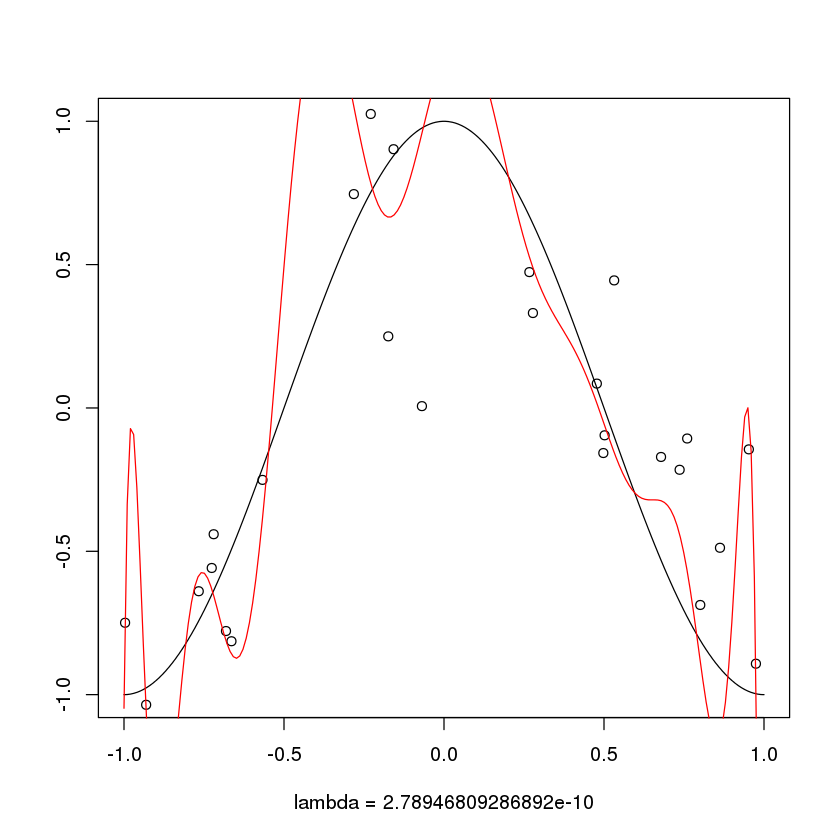

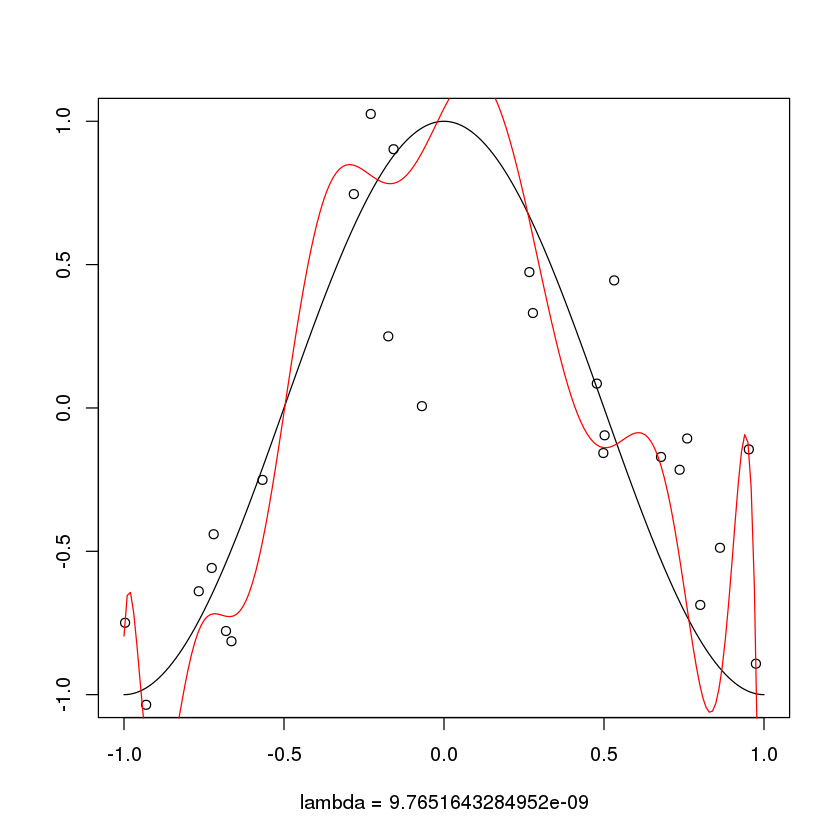

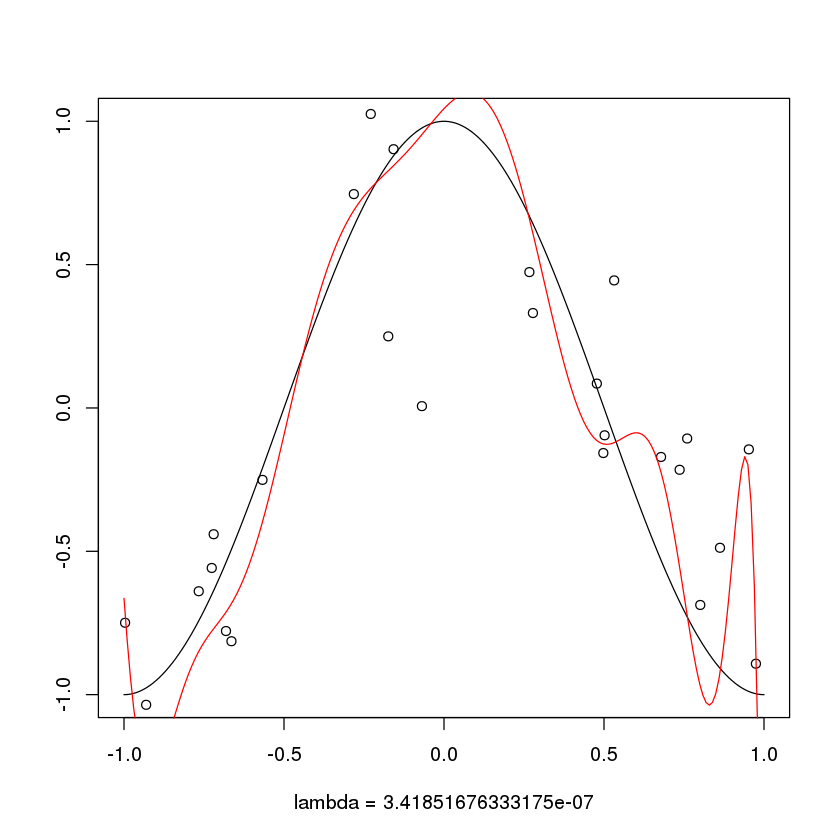

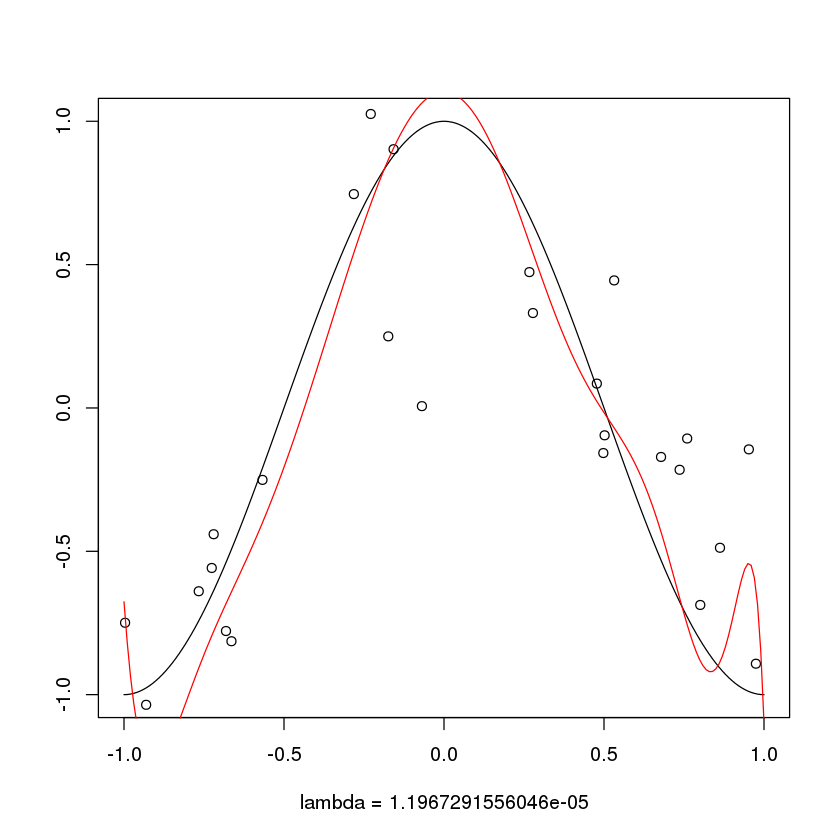

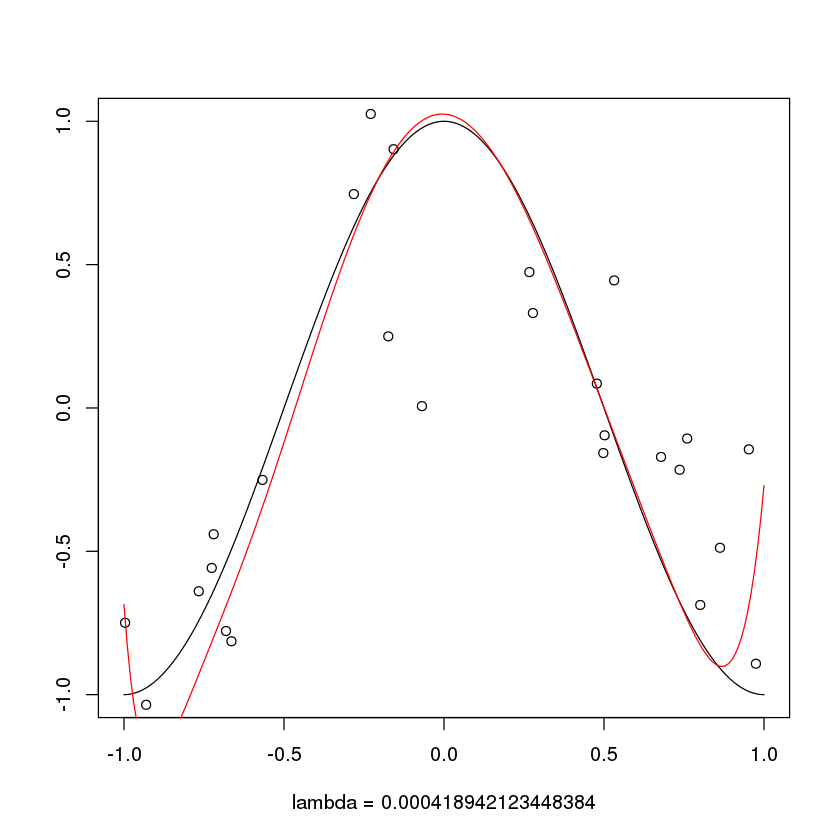

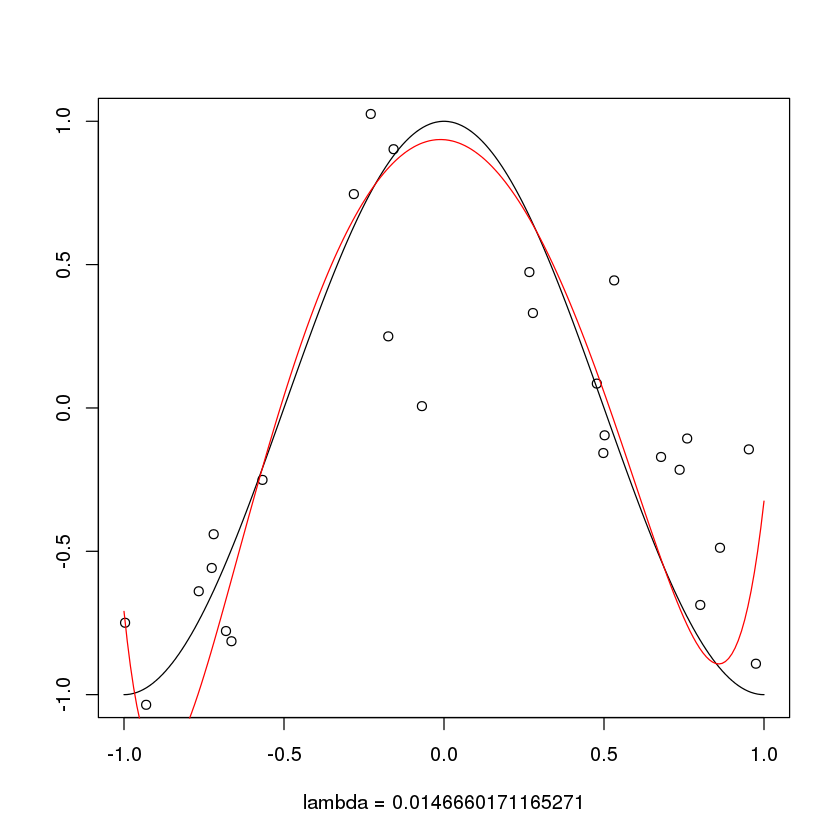

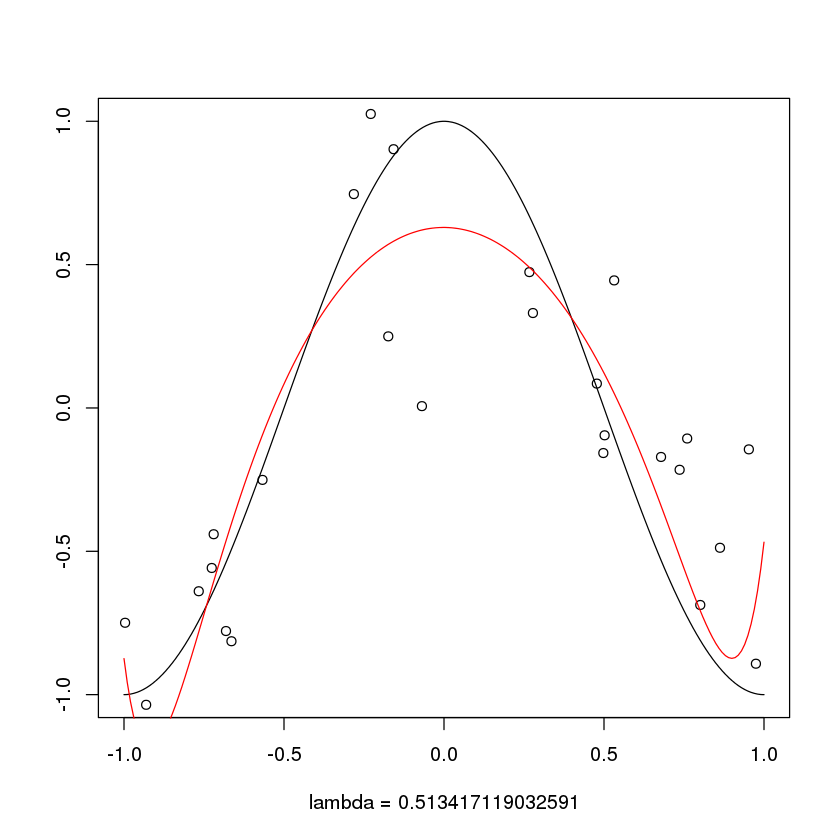

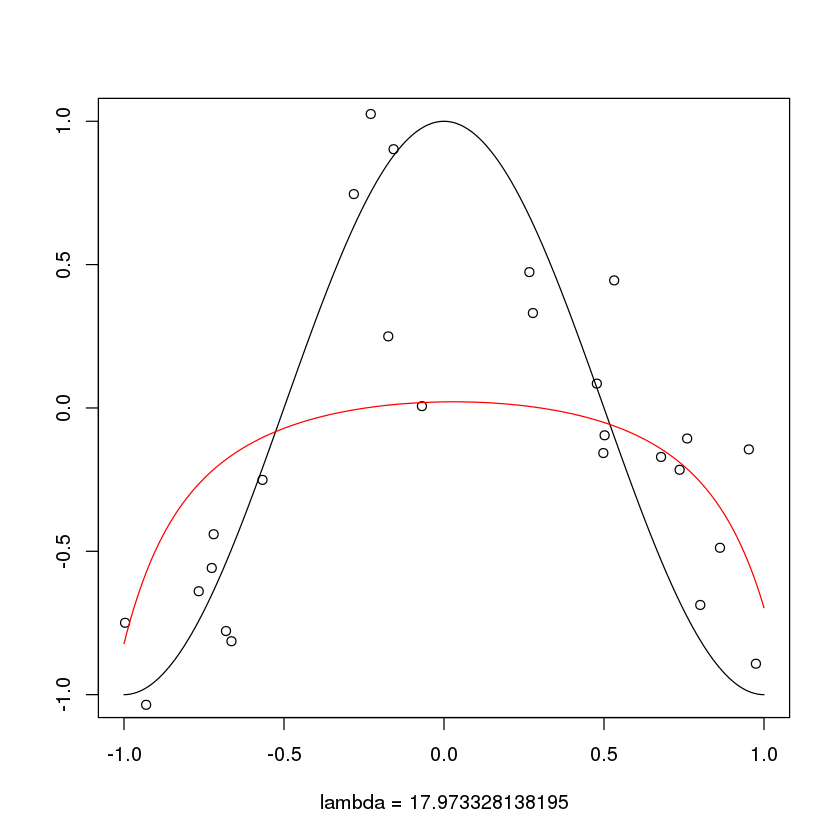

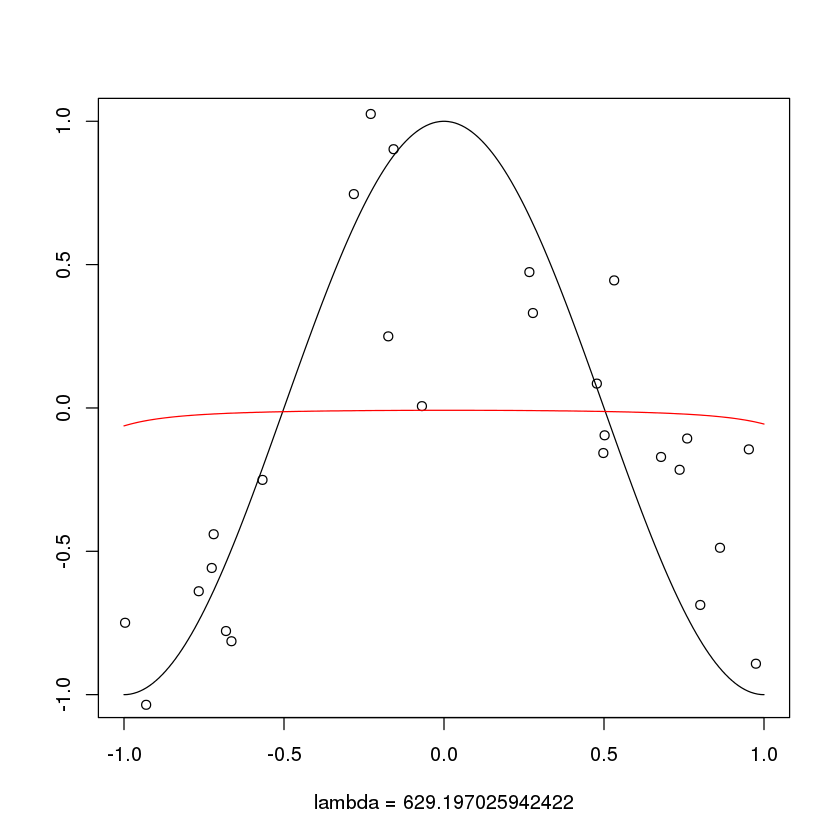

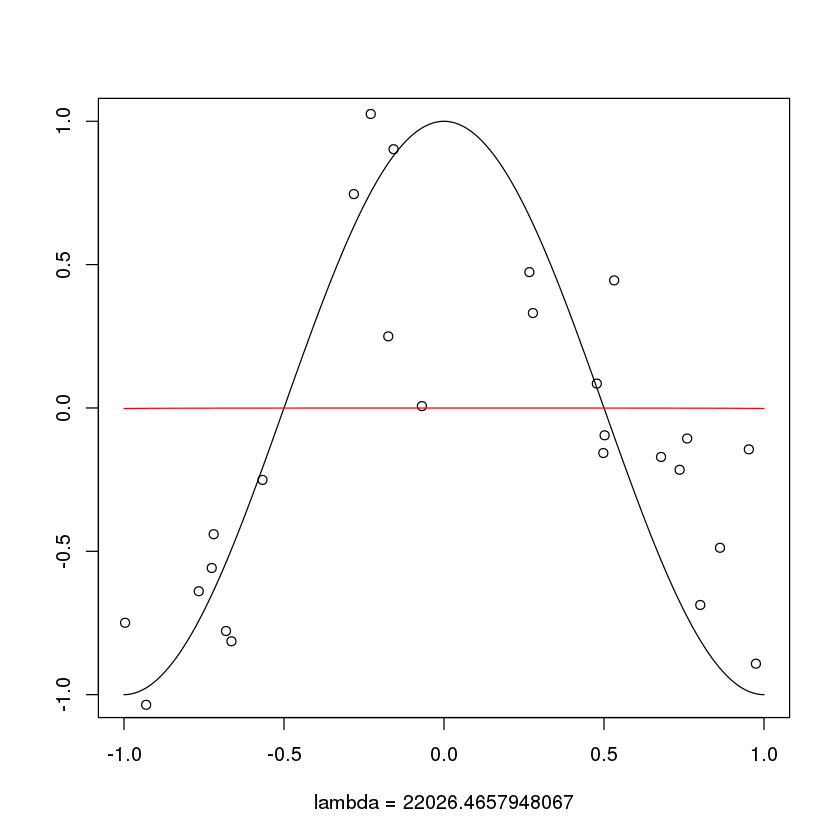

In [3]:
# The true model is y = f^*(x) + u where u is normal with zero
# mean and standard deviation sigma, and f^* is as below.  The
# variable x is drawn IID from U[-1,1]
sigma <- 0.5
fstar <- function(x) return(cos(pi * x))

# Function to generate n input/output pairs
sample_pairs <- function(n) {  
    inputs <- runif(n, min=-1, max=1)
    shocks <- sigma * rnorm(n)
    outputs <- fstar(inputs) + shocks
    return(list(x=inputs, y=outputs))
}

# Map vector x_i into matrix x_i^j where j=1,...,d
Phi <- function(x, d) {
    n <- length(x)
    P <- matrix(nrow=n, ncol=(d+1))
    for (i in 1:n) P[i,] <- x[i]^(0:d)
    return(P)
}
    

# Vectorized polynomial function
polynom <- function(xvec, coefficients) {
    D <- length(coefficients) - 1  # Degree of polynomial
    return(Phi(xvec, D) %*% coefficients)
}

# Compute risk of polynomial.  The integration is w.r.t the 
# uniform density on [-1,1], which explains division by 2.
risk <- function(coefficients) {
    g <- function(s) return((polynom(s, coefficients) - fstar(s))^2)
    return(sigma^2 + integrate(g, -1, 1)$value/2)  
}
    


N <- 35
set.seed(1111)
data <- sample_pairs(N)  # Observed data

grid_size <- 200; xmin <- -1; xmax <- 1
x_grid <- seq(xmin, xmax, length=grid_size)


K <- 14  # Degree of polynomial
lambda <- exp(seq(-22, 10, length=10))
D <- length(lambda)
risks <- numeric(D)
for (d in 1:D) {
    Phimat <- Phi(data$x, K)
    A <- t(Phimat) %*% Phimat + lambda[d] * diag(K+1)
    b <- t(Phimat) %*% data$y
    gammahat <- solve(A,b)  # A^{-1} b
    risks[d] <- risk(gammahat)
    plot(x_grid, cos(pi * x_grid), type="l", 
        xlab=paste("lambda =", lambda[d]), ylab="", main="")
    points(data$x, data$y)
    lines(x_grid, polynom(x_grid, gammahat), col="red")
}

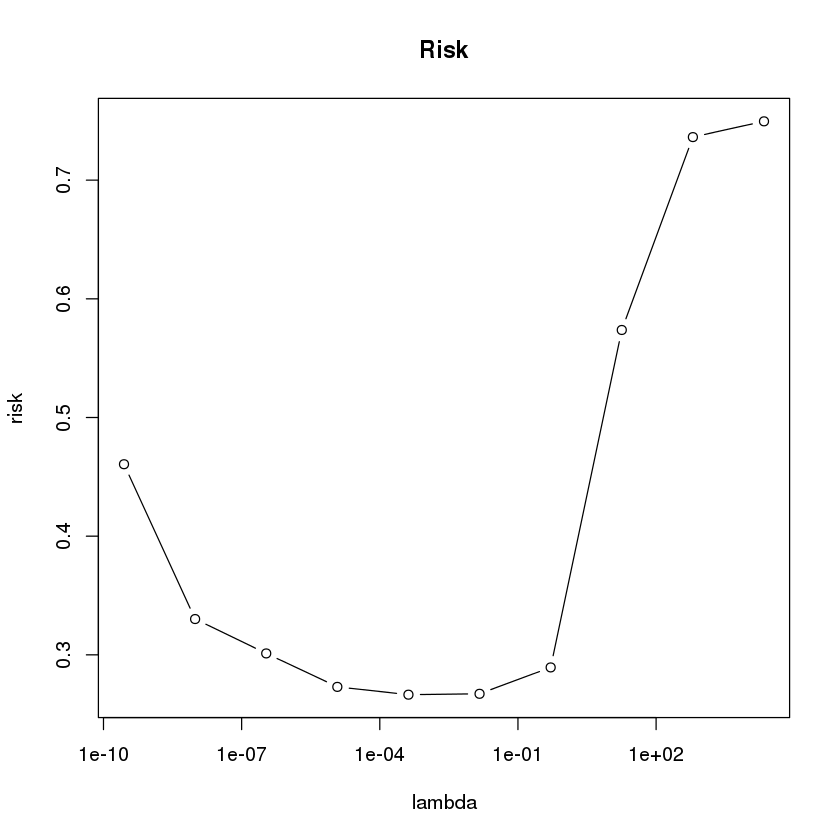

In [2]:

plot(lambda, risks, log="x", type="b", xlab="lambda", ylab="risk", main="Risk")